In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

In [3]:
file_name1 = os.path.join("Resources", "city_data.csv")
city_data = pd.read_csv(file_name1)
file_name2 = os.path.join("Resources", "ride_data.csv")
ride_data = pd.read_csv(file_name2)

In [4]:
city_ride_data = ride_data.groupby(['city'])
avg_fare_per_city = city_ride_data['fare'].mean()
total_fare_per_city = city_ride_data['fare'].sum()

In [5]:
rides_by_city = ride_data.groupby(['city'])['ride_id'].count()

In [6]:
drivers_by_city = city_data['driver_count']

In [7]:
city_type = city_data['type']

In [8]:
data_summary = pd.DataFrame({"Avg. Fare (Per City)": avg_fare_per_city,
                                 "Total Fare (Per City)": total_fare_per_city,
                                  "Total Number of Rides (Per City)": rides_by_city,
                                  "Total Number of Drivers (Per City)": drivers_by_city.values,
                                  "City Type": city_type.values})

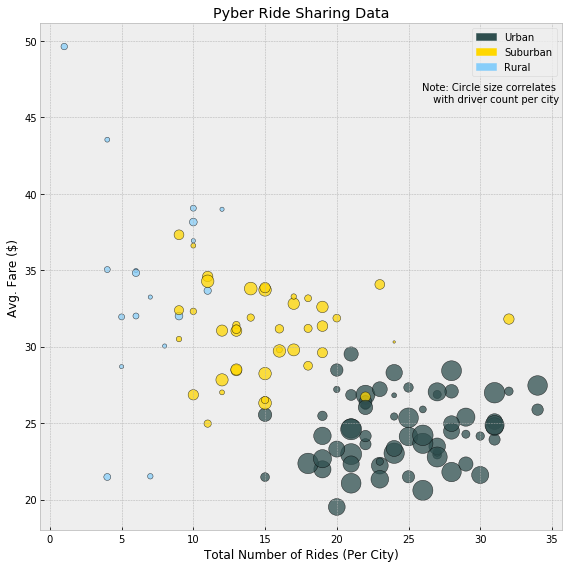

In [52]:
x = data_summary["Total Number of Rides (Per City)"]
y = data_summary["Avg. Fare (Per City)"]
s = drivers_by_city

colors = np.where(data_summary["City Type"]=="Urban","darkslategray",'-')
colors[data_summary["City Type"]=="Suburban"] = "gold"
colors[data_summary["City Type"]=="Rural"] = "lightskyblue"

with plt.style.context('bmh'):
    plt.figure(figsize=(8, 8))
    plt.scatter(x,y,s=6*s,c=colors,alpha=.75,edgecolor='black')
    plt.title("Pyber Ride Sharing Data")
    plt.xlabel("Total Number of Rides (Per City)")
    plt.ylabel("Avg. Fare ($)")
    urban_patch = mpatches.Patch(color="darkslategray", label='Urban')
    suburban_patch = mpatches.Patch(color="gold", label='Suburban')
    rural_patch = mpatches.Patch(color="lightskyblue", label='Rural')
    plt.legend(handles=[urban_patch,suburban_patch,rural_patch])    
    plt.text(35.5, 46,"Note: Circle size correlates \n with driver count per city", horizontalalignment='right', size='medium', color='black')
    plt.tight_layout()
    plt.show()

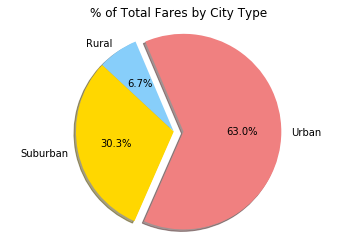

In [26]:
plt.title("% of Total Fares by City Type")
labels = ['Rural', 'Suburban', 'Urban']
colors = ['lightskyblue','gold','lightcoral']
explode = (0, 0, 0.1)
plt.pie(data_summary.groupby(['City Type'])['Total Fare (Per City)'].sum(), explode=explode, labels=labels, colors=colors, autopct="%1.1F%%", shadow = True,startangle=113)
plt.axis("equal")
plt.show()

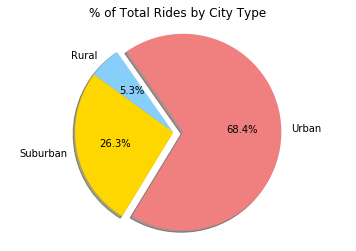

In [27]:
plt.title("% of Total Rides by City Type")
labels = ['Rural', 'Suburban', 'Urban']
colors = ['lightskyblue','gold','lightcoral']
explode = (0, 0, 0.1)
plt.pie(data_summary.groupby(['City Type'])['Total Number of Rides (Per City)'].sum(), explode=explode, labels=labels, colors=colors, autopct="%1.1F%%", shadow = True,startangle=125)
plt.axis("equal")
plt.show()

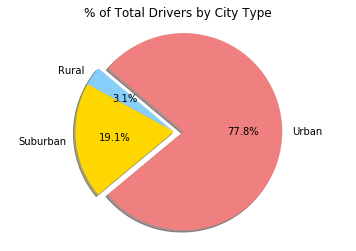

In [28]:
plt.title("% of Total Drivers by City Type")
labels = ['Rural', 'Suburban', 'Urban']
colors = ['lightskyblue','gold','lightcoral']
explode = (0, 0, 0.1)
plt.pie(data_summary.groupby(['City Type'])['Total Number of Drivers (Per City)'].sum(), explode=explode, labels=labels, colors=colors, autopct="%1.1F%%", shadow = True,startangle=140)
plt.axis("equal")
plt.show()

Three Observable Trends:
1. As the number of rides in a city increases, the average fare for the ride decreases. This suggests that people do not ride as far when in urban areas. 

2. As the number of drivers in a city increases, the average fare decreases as well. The number of drivers increases as the size of the city increases and this suggests people in larger cities take shorter rides. Therefore the fares decrease as well. People in rural areas take longer rides with larger fares.

3. The three pie charts suggest that the majority of the business is done in urban areas. Despite the fact that rural rides and in most cases suburban rides have higher average fares than urban rides, the majority of overall fares come from urban cities. The large majority of rides and drivers also occur in urban areas. This suggests that the company should focus on urban markets when considering growth.
